In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder
import numpy as np
from sklearn.model_selection import train_test_split
import chardet


C:\Users\puvit\AppData\Local\Temp\ipykernel_13004\1776293600.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname', 'Balance'], axis=1, inplace=True)
Lb = LabelEncoder()
df['Geography'] = Lb.fit_transform(df['Geography'])
df['Gender'] = Lb.fit_transform(df['Gender'])

In [10]:
X = df.drop('Exited', axis=1)
y = df['Exited']

In [6]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,1,1,1,101348.88,1
1,608,2,0,41,1,1,0,1,112542.58,0
2,502,0,0,42,8,3,1,0,113931.57,1
3,699,0,0,39,1,2,0,0,93826.63,0
4,850,2,0,43,2,1,1,1,79084.10,0


In [7]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

In [14]:

plt.show()

KeyError: 'Balance'

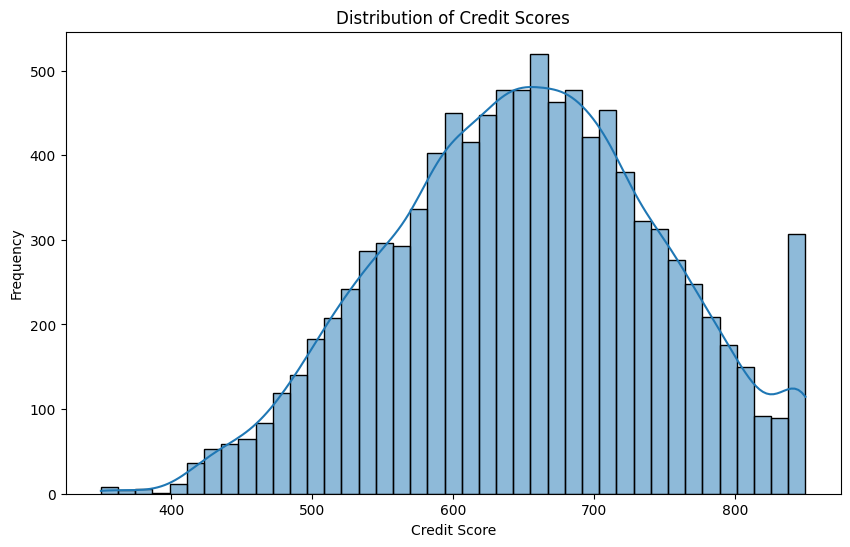

In [15]:
plt.figure(figsize=(10, 6))
sns.histplot(df['CreditScore'], kde=True)
plt.title('Distribution of Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.show()

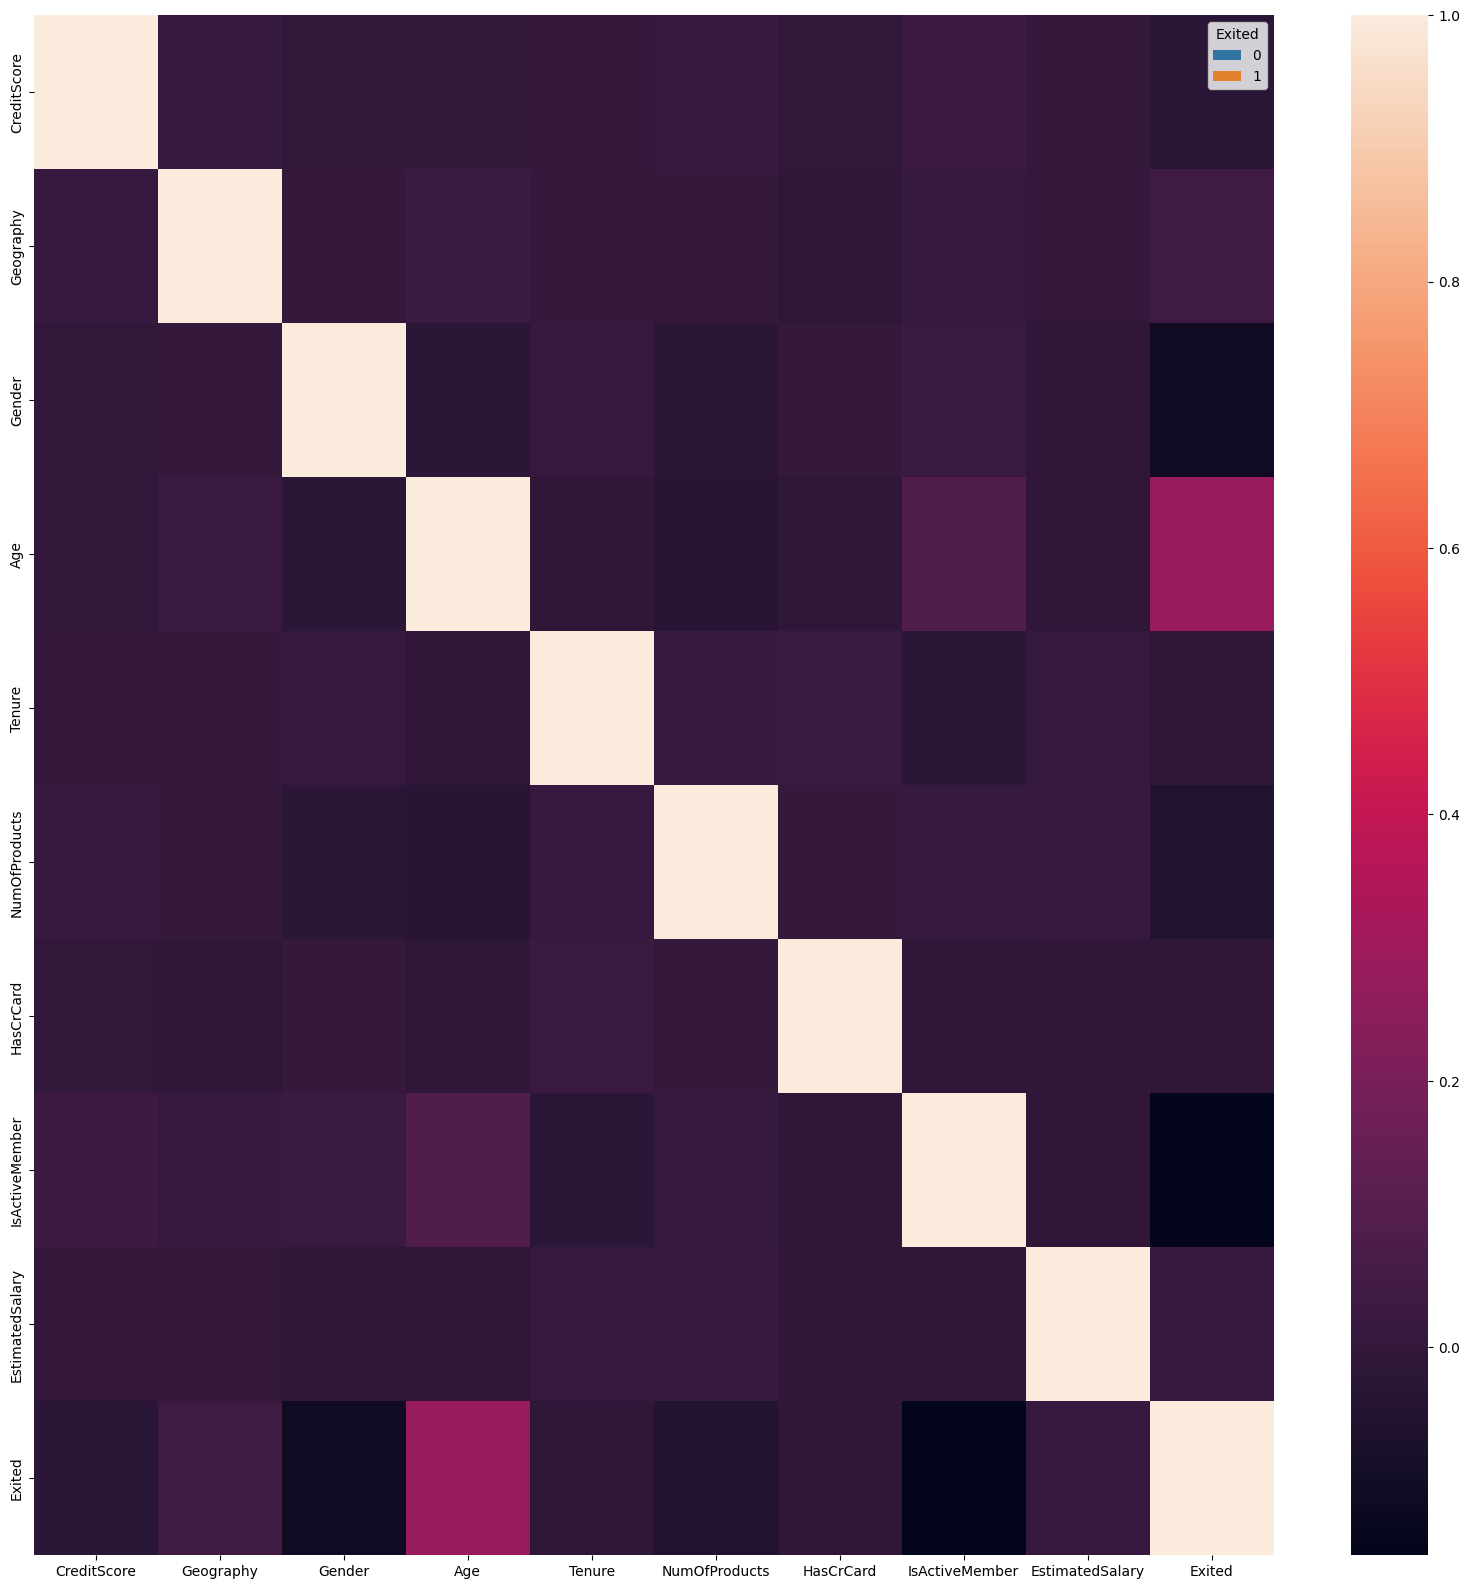

In [16]:
plt.figure(figsize=(20,20))
sns.countplot(x='Geography',hue='Exited',data=df)

sns.heatmap(df.corr())

plt.show()

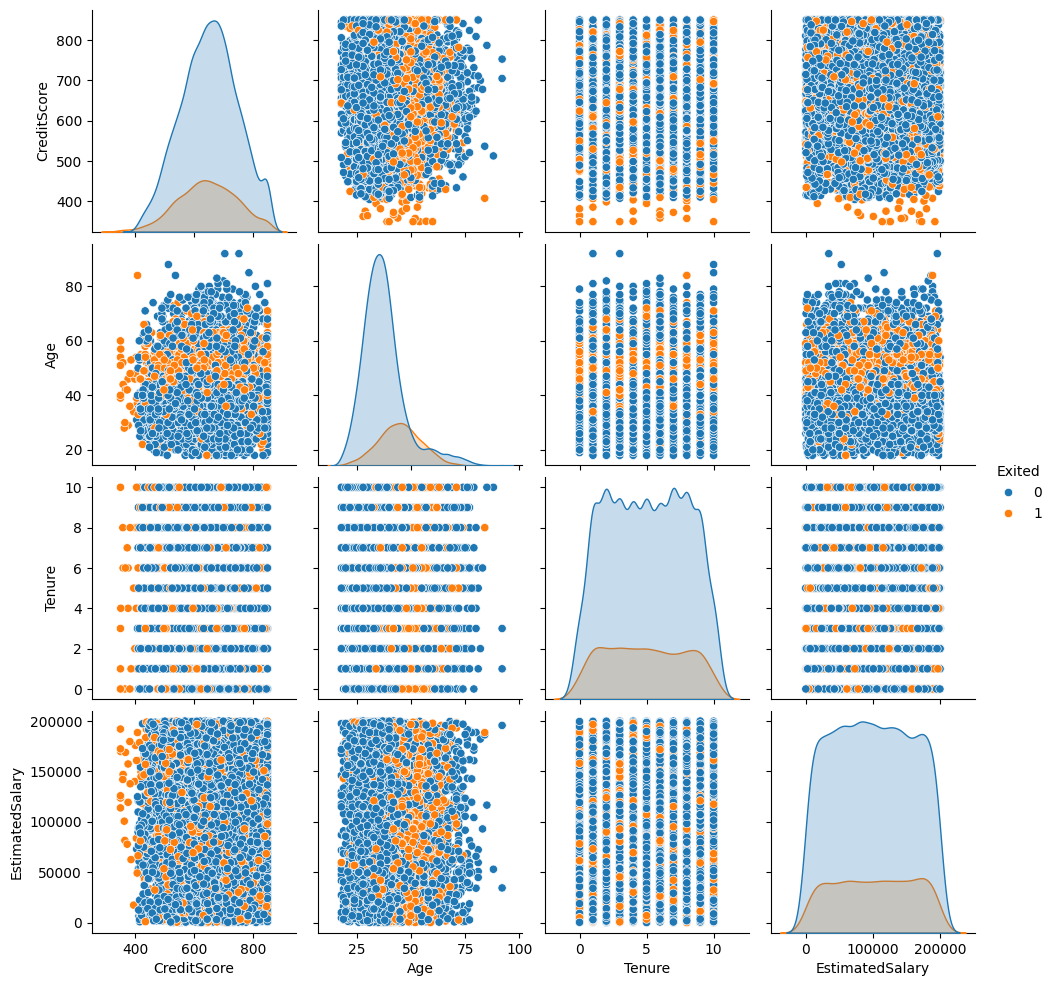

In [17]:
sns.pairplot(df[['CreditScore', 'Age', 'Tenure', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [13]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)


print(f'Accuracy: Random {accuracy}')



Accuracy: Random 0.8615


This model is 90% accurate


In [12]:
newInput = [502	,0,	0,	42,	8	,3,	1	,0,	113931.57	]
newInput = np.array(newInput)
newInput = newInput.reshape(1,-1)
newInput = scaler.transform(newInput)
prediction = model.predict(newInput)
print(prediction)

[1]


C:\Users\puvit\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
